# Warren Buffet Vaccine Portfolio Risk and Returns (Coronavirus)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# 4 Companies Vaccine 
symbols = ['ABBV','MRK','PFE','BMY']
start = '2020-01-01'
end = '2020-11-27'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

328

In [7]:
df.head()

,ABBV,MRK,PFE,BMY
Date,,,,
2020-01-02,84.852608,89.912033,35.677311,61.879055
2020-01-03,84.047203,89.140297,35.485886,61.331974
2020-01-06,84.710480,89.521278,35.440315,61.527363
2020-01-07,84.227234,87.137688,35.321815,62.455448
2020-01-08,84.824188,86.551559,35.604385,62.387066


In [8]:
df.tail()

,ABBV,MRK,PFE,BMY
Date,,,,
2020-11-19,99.669998,80.389999,36.189999,62.090000
2020-11-20,100.839996,80.449997,36.700001,61.610001
2020-11-23,102.180000,80.279999,36.520000,61.919998
2020-11-24,103.959999,80.139999,36.599998,63.220001
2020-11-25,104.199997,80.059998,36.529999,62.840000


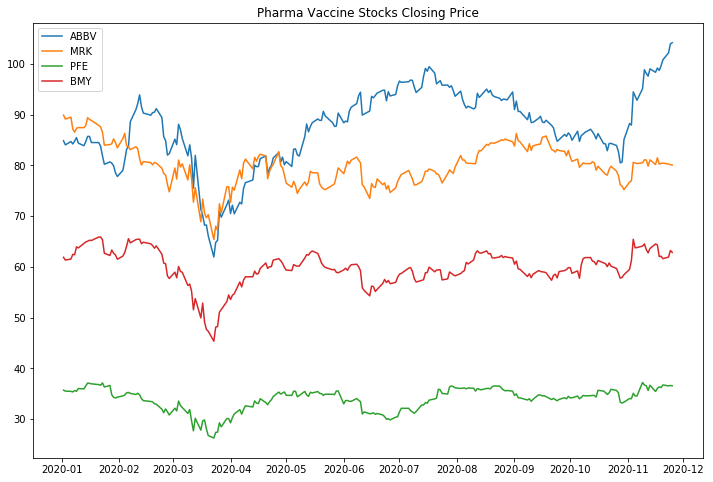

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title('Pharma Vaccine Stocks Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

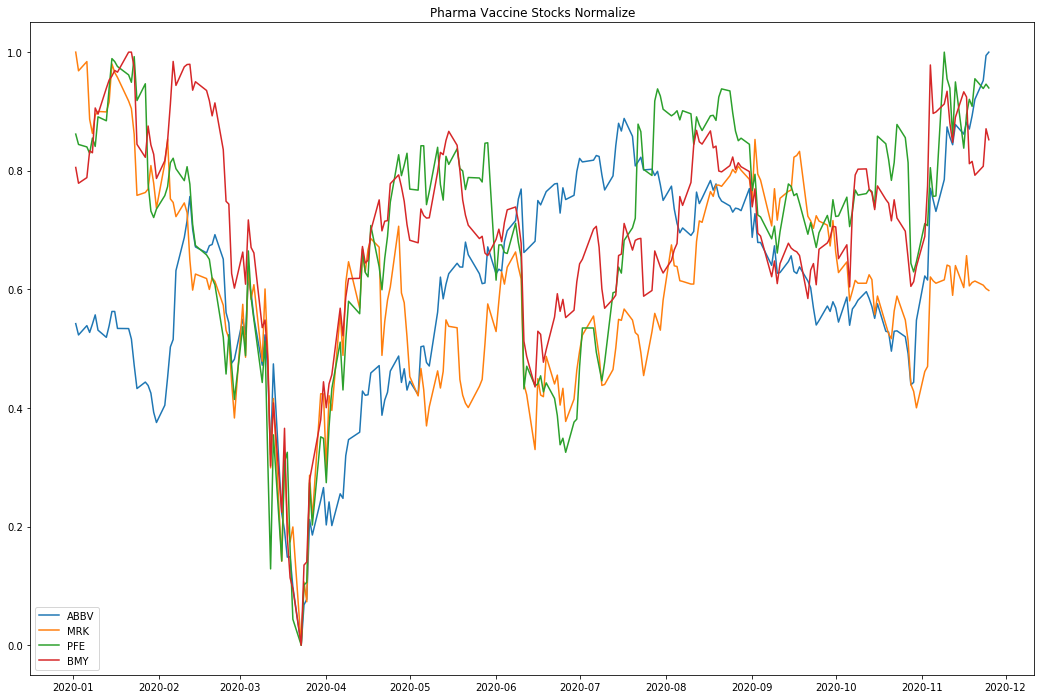

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Pharma Vaccine Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

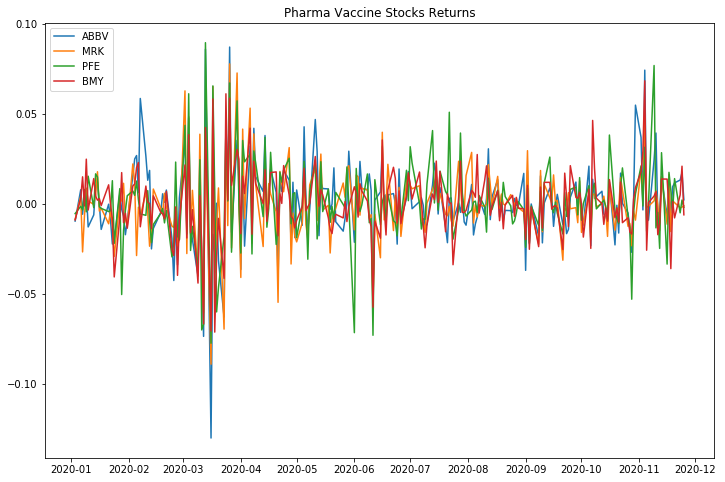

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title('Pharma Vaccine Stocks Returns')
plt.legend(labels=stock_rets.columns)

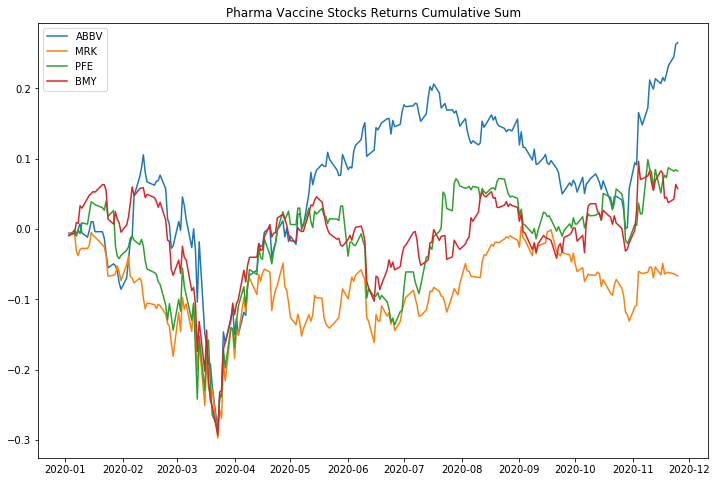

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Pharma Vaccine Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

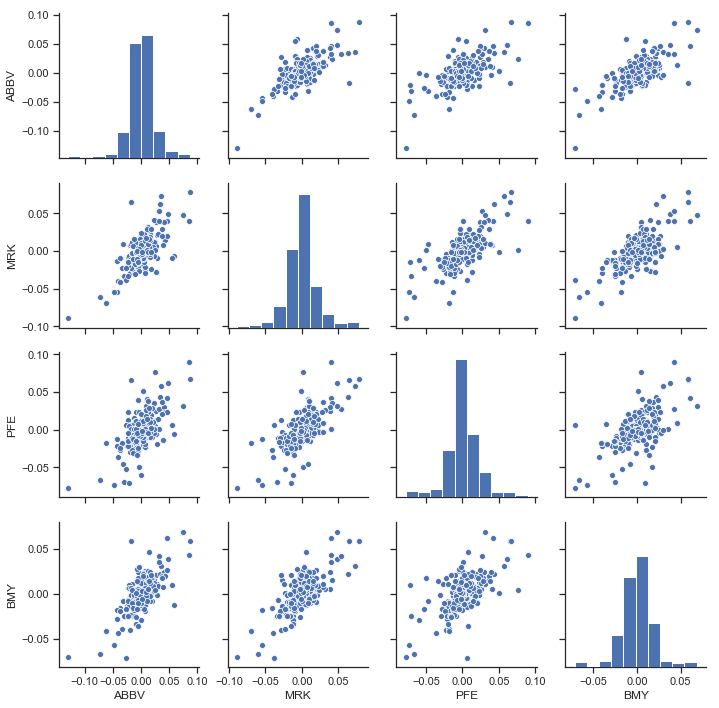

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

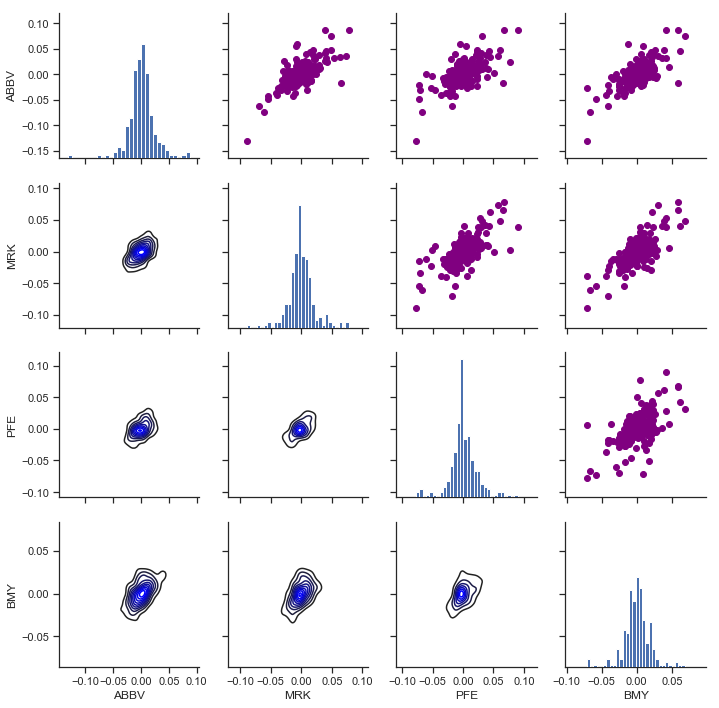

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

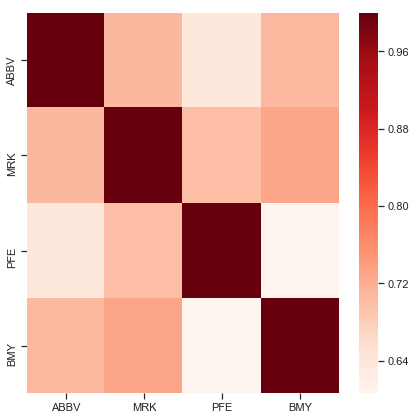

In [17]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

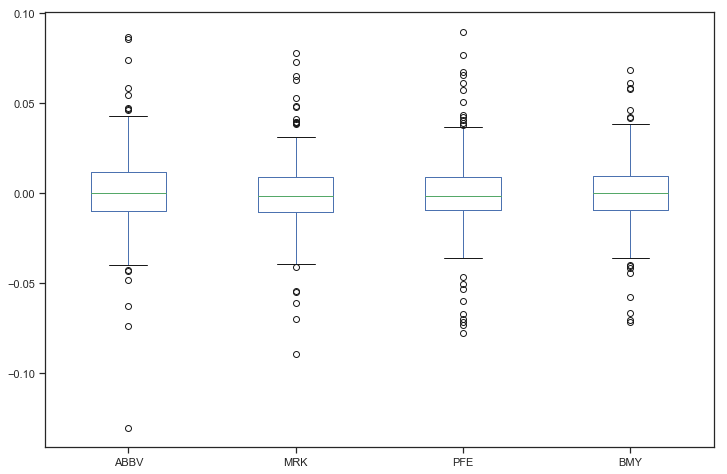

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

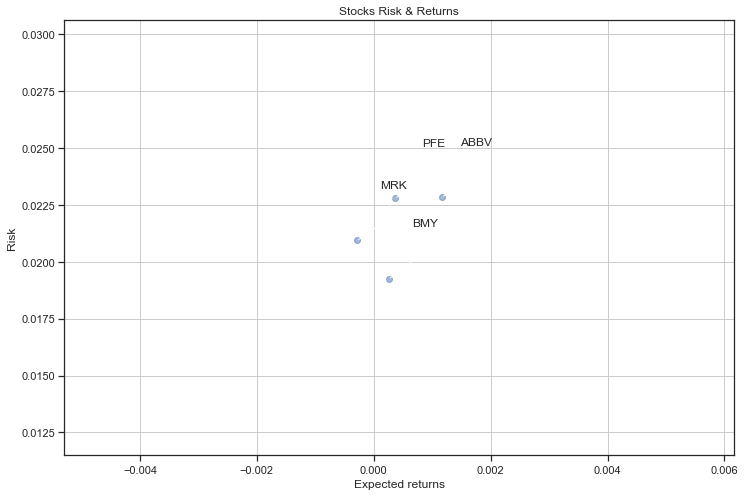

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

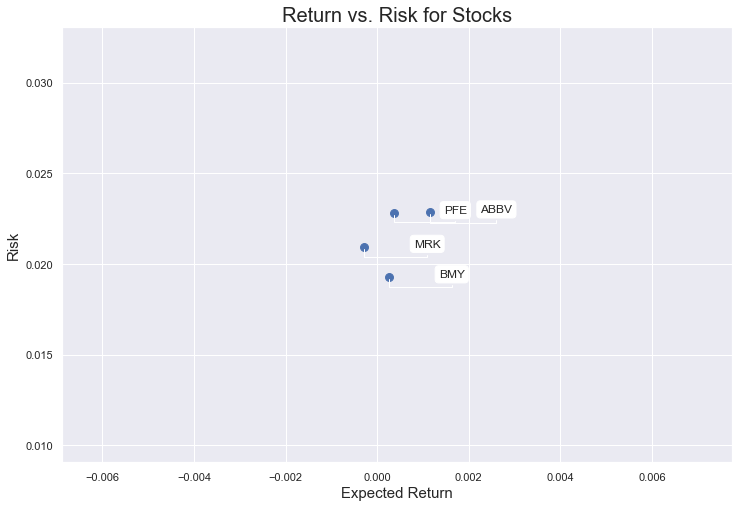

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

BMY   BMY     1.000000
PFE   PFE     1.000000
MRK   MRK     1.000000
ABBV  ABBV    1.000000
BMY   MRK     0.730678
MRK   BMY     0.730678
      ABBV    0.708299
ABBV  MRK     0.708299
BMY   ABBV    0.706911
ABBV  BMY     0.706911
PFE   MRK     0.701532
MRK   PFE     0.701532
PFE   ABBV    0.640402
ABBV  PFE     0.640402
BMY   PFE     0.606196
PFE   BMY     0.606196
dtype: float64

In [22]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,ABBV,MRK,PFE,BMY
Date,,,,
2020-01-03,0.554937,0.481979,0.431144,0.446546
2020-01-06,0.634973,0.559048,0.455590,0.532701
2020-01-07,0.572374,0.373827,0.443254,0.617934
2020-01-08,0.631270,0.493109,0.511199,0.502036
2020-01-09,0.634126,0.586201,0.437214,0.688237


In [23]:
Normalized_Value.corr()

,ABBV,MRK,PFE,BMY
ABBV,1.000000,0.708299,0.640402,0.706911
MRK,0.708299,1.000000,0.701532,0.730678
PFE,0.640402,0.701532,1.000000,0.606196
BMY,0.706911,0.730678,0.606196,1.000000


In [24]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

BMY   BMY     1.000000
PFE   PFE     1.000000
MRK   MRK     1.000000
ABBV  ABBV    1.000000
BMY   MRK     0.730678
MRK   BMY     0.730678
      ABBV    0.708299
ABBV  MRK     0.708299
BMY   ABBV    0.706911
ABBV  BMY     0.706911
PFE   MRK     0.701532
MRK   PFE     0.701532
PFE   ABBV    0.640402
ABBV  PFE     0.640402
BMY   PFE     0.606196
PFE   BMY     0.606196
dtype: float64

In [25]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
ABBV    0.001163
MRK    -0.000291
PFE     0.000362
BMY     0.000253
dtype: float64
--------------------------------------------------
Stock risks:
ABBV    0.022844
MRK     0.020943
PFE     0.022804
BMY     0.019263
dtype: float64


In [26]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
MRK,-0.000291,0.020943
BMY,0.000253,0.019263
PFE,0.000362,0.022804
ABBV,0.001163,0.022844


In [27]:
table.sort_values(by='Risk')

,Returns,Risk
BMY,0.000253,0.019263
MRK,-0.000291,0.020943
PFE,0.000362,0.022804
ABBV,0.001163,0.022844


In [28]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
ABBV,0.001163,0.022844,-0.386856
MRK,-0.000291,0.020943,-0.491361
PFE,0.000362,0.022804,-0.422622
BMY,0.000253,0.019263,-0.506008


In [29]:
table['Max Returns'] = rets.max()

In [30]:
table['Min Returns'] = rets.min()

In [31]:
table['Median Returns'] = rets.median()

In [32]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
ABBV,0.001163,0.022844,-0.386856,0.087174,-0.130022,0.000535,0.230856
MRK,-0.000291,0.020943,-0.491361,0.077836,-0.088990,-0.001376,-0.099828
PFE,0.000362,0.022804,-0.422622,0.089607,-0.077346,-0.001306,-0.191256
BMY,0.000253,0.019263,-0.506008,0.068419,-0.071178,0.000249,-0.601077


In [33]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
ABBV,0.001163,0.022844,-0.386856,0.087174,-0.130022,0.000535,0.230856,0.000007
MRK,-0.000291,0.020943,-0.491361,0.077836,-0.088990,-0.001376,-0.099828,-0.000003
PFE,0.000362,0.022804,-0.422622,0.089607,-0.077346,-0.001306,-0.191256,-0.000006
BMY,0.000253,0.019263,-0.506008,0.068419,-0.071178,0.000249,-0.601077,-0.000018


In [34]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
ABBV,0.001163,0.022844,-0.386856,0.087174,-0.130022,0.000535,0.230856,0.000007,0.170937
MRK,-0.000291,0.020943,-0.491361,0.077836,-0.088990,-0.001376,-0.099828,-0.000003,-0.085305
PFE,0.000362,0.022804,-0.422622,0.089607,-0.077346,-0.001306,-0.191256,-0.000006,0.018312
BMY,0.000253,0.019263,-0.506008,0.068419,-0.071178,0.000249,-0.601077,-0.000018,0.011910


In [35]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
BMY,0.000253,0.019263,-0.506008,0.068419,-0.071178,0.000249,-0.601077,-0.000018,0.011910
PFE,0.000362,0.022804,-0.422622,0.089607,-0.077346,-0.001306,-0.191256,-0.000006,0.018312
MRK,-0.000291,0.020943,-0.491361,0.077836,-0.088990,-0.001376,-0.099828,-0.000003,-0.085305
ABBV,0.001163,0.022844,-0.386856,0.087174,-0.130022,0.000535,0.230856,0.000007,0.170937
